In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [5]:
TRAIN = True

In [6]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [7]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [8]:
subs_csi.head(1)

,SK_ID,CSI,CONTACT_DATE
0,2,0,04.05


In [9]:
subs_csi.shape

(4222, 3)

In [10]:
subs_bs_consumption = pd.read_csv(pathfiles + path_subs_bs_consumption, sep=';', decimal=',')

In [11]:
subs_bs_consumption['month'] = subs_bs_consumption['MON'].apply(lambda x:int(str(x).split('.')[1]))

In [12]:
subs_bs_consumption.head(1)

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN,month
0,1827,240277,01.03,0.0,0.000002,0.000234,3


In [13]:
subs_bs_consumption.shape

(1092544, 7)

In [14]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [15]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,3853,61951,0.000004,04.04 05:00:00


In [16]:
subs_bs_data_session.shape

(3473203, 4)

In [17]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [18]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0


In [19]:
subs_features.shape

(47411, 36)

In [20]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [21]:
cats = subs_features['COM_CAT#24'].unique()
subs_features['COM_CAT#242'] = pd.Categorical(subs_features['COM_CAT#24'], categories=cats)
subs_features['COM_CAT#242'] = subs_features['COM_CAT#242'].cat.codes

In [22]:
subs_features['COM_CAT#34'].fillna(0, inplace=True)
subs_features['COM_CAT#8'].fillna(0, inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(0, inplace=True)
subs_features['ARPU_GROUP'].fillna(0, inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(0, inplace=True)

In [23]:
subs_features.dropna().shape

(47411, 37)

In [24]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [25]:
columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
          'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
          'COST', 'COM_CAT#242']
for i in range(18):
    if i + 17 == 24:
        continue
    columns.append('COM_CAT#{}'.format(i+17))

In [26]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
0,2001-08-01,4,3339,80,5,2,1,12.0,1,1489.0,...,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0,0,8,2001
1,2001-08-01,4,238,75,5,2,1,7.0,1,945.0,...,0.012981,0.000000,0.0000,0.048930,0.027579,0.103896,3.0,0,8,2001
2,2001-08-01,4,4669,43,5,2,1,3.0,3,1033.0,...,0.000000,0.000000,0.0000,0.009397,0.027579,0.103896,3.0,0,8,2001
3,2001-08-01,4,2555,54,5,2,1,12.0,1,512.0,...,0.039486,0.000829,0.0000,0.196676,0.027579,0.103896,1.0,0,8,2001
4,2001-08-01,4,2291,38,5,2,1,7.0,1,1268.0,...,0.007385,0.003884,0.0000,0.047297,0.027579,0.103896,6.0,0,8,2001


In [27]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
count,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,...,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000
mean,4.538019,2346.231107,41.213642,5.267280,1.938706,0.990909,7.669402,2.378119,863.775727,4.609015,...,0.018507,0.004788,0.005083,0.046062,0.028243,0.104881,5.349391,0.000591,6.439265,2001.432853
std,2.175724,1365.543733,22.381202,2.757143,0.239871,0.094912,3.182796,1.587738,517.414836,0.910221,...,0.031138,0.017611,0.021956,0.051001,0.009148,0.007879,3.634229,0.054338,3.467740,0.495476
min,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2001.000000
25%,3.000000,1160.000000,25.000000,5.000000,2.000000,1.000000,5.000000,1.000000,387.000000,5.000000,...,0.001073,0.000000,0.000000,0.011571,0.027579,0.103896,2.000000,0.000000,3.000000,2001.000000
50%,4.000000,2345.000000,38.000000,5.000000,2.000000,1.000000,8.000000,2.000000,915.000000,5.000000,...,0.007226,0.000120,0.000000,0.031394,0.027579,0.103896,3.000000,0.000000,6.000000,2001.000000
75%,6.000000,3543.000000,60.000000,5.000000,2.000000,1.000000,10.000000,3.000000,1318.000000,5.000000,...,0.022745,0.003028,0.000383,0.063415,0.027579,0.103896,9.000000,0.000000,9.000000,2002.000000
max,8.000000,4702.000000,83.000000,17.000000,2.000000,1.000000,12.000000,9.000000,1702.000000,8.000000,...,0.645294,1.000000,1.000000,1.000000,0.560674,0.377696,10.000000,7.000000,12.000000,2002.000000


In [28]:
if TRAIN:
    factors = {}
for c in columns:
    #emean =  np.mean(subs_features[c])
    if TRAIN:
        emin = np.min(subs_features[c])
    else:
        emin = factors[c][0]
    #subs_features[c] -= emean
    subs_features[c] -= emin
    if TRAIN:
        emax = np.max(subs_features[c])
    else:
        emax = factors[c][1]
    subs_features[c] /= emax
    if TRAIN:
        factors[c] = (emin, emax)

In [29]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
count,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,...,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000
mean,0.505431,2346.231107,0.490410,0.266705,0.938706,0.990909,0.639117,0.172265,0.507506,0.576127,...,0.028680,0.004788,0.005083,0.046062,0.050374,0.277687,0.534939,0.000084,6.439265,2001.432853
std,0.310818,1365.543733,0.272941,0.172321,0.239871,0.094912,0.265233,0.198467,0.304004,0.113778,...,0.048254,0.017611,0.021956,0.051001,0.016316,0.020860,0.363423,0.007763,3.467740,0.495476
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2001.000000
25%,0.285714,1160.000000,0.292683,0.250000,1.000000,1.000000,0.416667,0.000000,0.227380,0.625000,...,0.001663,0.000000,0.000000,0.011571,0.049189,0.275078,0.200000,0.000000,3.000000,2001.000000
50%,0.428571,2345.000000,0.451220,0.250000,1.000000,1.000000,0.666667,0.125000,0.537603,0.625000,...,0.011198,0.000120,0.000000,0.031394,0.049189,0.275078,0.300000,0.000000,6.000000,2001.000000
75%,0.714286,3543.000000,0.719512,0.250000,1.000000,1.000000,0.833333,0.250000,0.774383,0.625000,...,0.035247,0.003028,0.000383,0.063415,0.049189,0.275078,0.900000,0.000000,9.000000,2002.000000
max,1.000000,4702.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2002.000000


In [30]:
subs_features[columns].describe()

,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,INTERNET_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
count,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,...,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000
mean,0.505431,0.490410,0.266705,0.938706,0.990909,0.639117,0.172265,0.507506,0.576127,0.632617,...,0.999852,0.988420,0.017048,0.028680,0.004788,0.005083,0.046062,0.050374,0.277687,0.534939
std,0.310818,0.272941,0.172321,0.239871,0.094912,0.265233,0.198467,0.304004,0.113778,0.241901,...,0.012150,0.106985,0.025277,0.048254,0.017611,0.021956,0.051001,0.016316,0.020860,0.363423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.292683,0.250000,1.000000,1.000000,0.416667,0.000000,0.227380,0.625000,0.333333,...,1.000000,1.000000,0.002169,0.001663,0.000000,0.000000,0.011571,0.049189,0.275078,0.200000
50%,0.428571,0.451220,0.250000,1.000000,1.000000,0.666667,0.125000,0.537603,0.625000,0.666667,...,1.000000,1.000000,0.008714,0.011198,0.000120,0.000000,0.031394,0.049189,0.275078,0.300000
75%,0.714286,0.719512,0.250000,1.000000,1.000000,0.833333,0.250000,0.774383,0.625000,0.666667,...,1.000000,1.000000,0.022257,0.035247,0.003028,0.000383,0.063415,0.049189,0.275078,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST', 'COM_CAT#242']
    for i in range(18):
        if i + 17 == 24:
            if data.shape[0] == 1:
                d = data[['COM_CAT#24']].values[0].tolist()[0]
                dt = str(d).split('.')
                c_month = int(dt[1])
                c_day = int(dt[0])
                delta = (datetime(2002, fix_month, day) - datetime(2001 if d == '31.12' else 2002, c_month, c_day)).days
            continue
        columns.append('COM_CAT#{}'.format(i+17))
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, np.zeros(len(columns))

In [32]:
# for dnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    #line = [sk_id]
    #table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    row = []
    for j in range(12):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        #line.extend(new_line[1])
        row.append(new_line[1])
        #table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(row)
    if TRAIN:
        y[i[0]] = i[1][1]

In [33]:
data = np.array(table)

In [34]:
data.shape

(4222, 12, 34)

In [35]:
np.max(data)

1.0

In [36]:
columns_avg = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G']

In [37]:
columns_chhn = ['AVEUSERNUMBER', 'AVEUSERNUMBER_PLMN',
       'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G',
       'AVR_DL_USER_LTE', 'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER',
       'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
       'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE',
       'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
       'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G',
       'DL_MEAN_USER_THROUGHPUT_PLTE', 'DL_MEAN_USER_THROUGHPUT_REL93G',
       'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
       'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G',
       'UL_AVR_THROUGHPUT_3G', 'UL_AVR_THROUGHPUT_LTE',
       'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE',
       'UL_MEAN_USER_THROUGHPUT_HS3G', 'UL_MEAN_USER_THROUGHPUT_PLTE',
       'UL_MEAN_USER_THROUGHPUT_REL93G']

In [38]:
def get_columns(count, postfix):
    return ['{} {}'.format(i, postfix) for i in range(count)]       

In [39]:
if TRAIN:
    scalers = {}

In [42]:
def get_extend_data(type_data, column_name, count, postfix):
    fname = pathfiles + path_features + '{}_{}.csv'.format(type_data, column_name)
    result = pd.read_csv(fname)
    table = []
    result = result[get_columns(count, postfix)]
    result.fillna(np.nanmean(result), inplace=True)
    for i in result.values:
        table.append(np.array(i).reshape((count, 1)))
    res_table = np.array(table)
    
    if TRAIN:
        scale_mean = np.min(res_table)
        res_table -= scale_mean
        scale_std = np.max(res_table)
        if scale_std != 0:
            res_table /= scale_std
        scalers[(type_data, column_name, count, postfix)] = (scale_mean, scale_std)
    else:
        scale_mean = scalers[(type_data, column_name, count, postfix)][0]
        scale_std = scalers[(type_data, column_name, count, postfix)][1]
        res_table -= scale_mean
        if scale_std != 0:
            res_table /= scale_std
    return res_table

def get_all_data():
    result = []
    count_days = 60
    for columns in [columns_avg, columns_chhn]:
        for type_data in ['data', 'voice']:
            for c in columns:
                result2 = None
                for a in ['sum', 'count', 'min', 'avg', 'max', 'mina', 'avga', 'maxa']:
                    t = get_extend_data(type_data, c, count_days, a)
                    if result2 is None:
                        result2 = t
                    else:
                        result2 = np.concatenate([result2, t], axis=2)
                result.append(result2)
    return result

In [43]:
data2 = get_all_data()

In [44]:
len(data2)

150

In [45]:
X = [np.asarray(i.tolist()) for i in data2]

In [46]:
y = np.asarray(y)

In [49]:
X[0].shape

(4222, 45, 8)

In [48]:
X = data2

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#X_train, X_test, y_train, y_test 
a = train_test_split(*X, y, test_size=0.2, random_state=43)

In [52]:
X_train = []
X_test = []
y_train = a[-2]
y_test = a[-1]
has_train = True
for i in a:
    if len(i.shape) == 1:
        continue
    if has_train:
        X_train.append(i)
    else:
        X_test.append(i)
    has_train = not has_train

In [53]:
from sklearn.utils.class_weight import compute_class_weight

In [54]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GlobalMaxPooling1D, GRU, Bidirectional, LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.metrics import roc_auc_score
from keras import regularizers, Input, layers

In [56]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [70]:
def create_sub_model(input_data):
    input_layer = Input(shape=input_data.shape[1:], dtype='float32')
    #x_0 = GRU(64, dropout=0.3, recurrent_dropout=0.3, activation='relu', kernel_regularizer=regularizers.l2(0.005))(input_layer)
    x_0 = Conv1D(32, 3, activation='relu')(input_layer)
    x_0 = MaxPooling1D(3)(x_0)
    x_0 = Conv1D(32, 3, activation='relu')(x_0)
    x_0 = GlobalMaxPooling1D()(x_0)
    x_0 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_0)
    
    return input_layer, x_0

def create_model():
    #build Keras model
    
    first_layers = []
    inputs = []
    for i in X_train:
        _input, _layer = create_sub_model(i)
        first_layers.append(_layer)
        inputs.append(_input)
    
    concatenated = layers.concatenate(first_layers, axis=-1)
    
    preds = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005))(concatenated)
    #preds = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.005))(preds)
    #preds = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.005))(preds)
    #preds = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.005))(preds)
    preds = Dense(1, activation='sigmoid')(concatenated)
        
    model = Model(inputs, preds)
        
    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

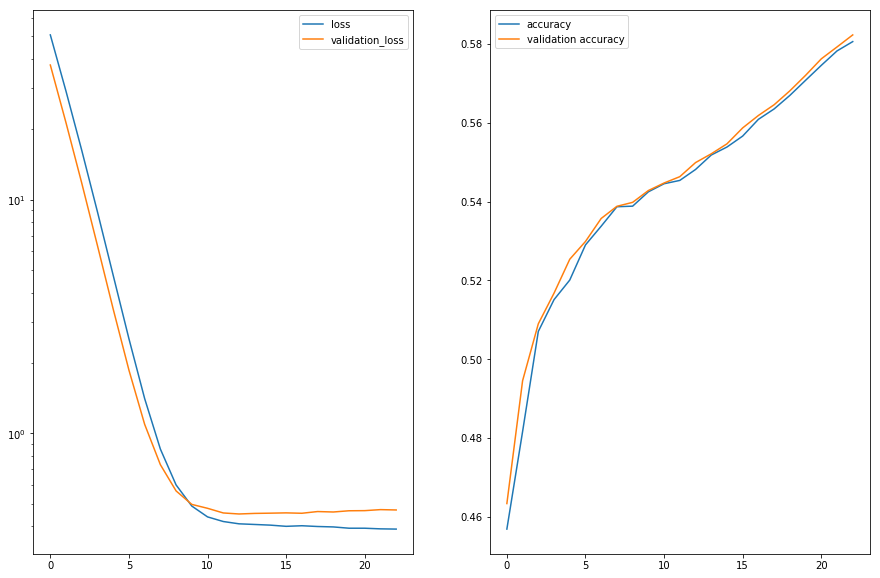

2701/2701 [==============================] - 416s 154ms/step - loss: 0.3891 - auc: 0.5806 - val_loss: 0.4698 - val_auc: 0.5823


In [71]:
count_epochs = 600
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
model = create_model()
early_stopping_monitor = EarlyStopping(patience=10)
history = model.fit([np.array(i) for i in X_train], np.array(y_train), batch_size = 64, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])

In [72]:
predict = model.predict([np.array(i) for i in X_test])
score = roc_auc_score(y_test, predict)
text = "Total roc auc score = {0:0.4f}".format(score)
print(text)

Total roc auc score = 0.5455


In [73]:
send_notify(text)

In [69]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_471 (InputLayer)          (None, 45, 8)        0                                            
__________________________________________________________________________________________________
input_472 (InputLayer)          (None, 45, 8)        0                                            
__________________________________________________________________________________________________
input_473 (InputLayer)          (None, 45, 8)        0                                            
__________________________________________________________________________________________________
input_474 (InputLayer)          (None, 45, 8)        0                                            
__________________________________________________________________________________________________
input_475 

gru_427 (GRU)                   (None, 32)           3936        input_577[0][0]                  
__________________________________________________________________________________________________
gru_428 (GRU)                   (None, 32)           3936        input_578[0][0]                  
__________________________________________________________________________________________________
gru_429 (GRU)                   (None, 32)           3936        input_579[0][0]                  
__________________________________________________________________________________________________
gru_430 (GRU)                   (None, 32)           3936        input_580[0][0]                  
__________________________________________________________________________________________________
gru_431 (GRU)                   (None, 32)           3936        input_581[0][0]                  
__________________________________________________________________________________________________
gru_432 (G

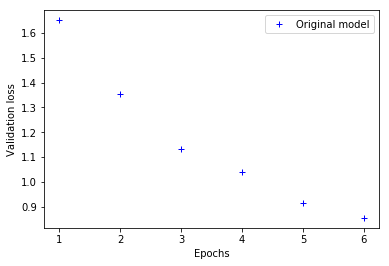

In [79]:
history_gr = history.history['val_loss']
import matplotlib.pyplot as plt
epochs = range(1, len(history_gr) + 1)
plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [141]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("output/sale_model3.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("output/sale_model3.h5")

In [100]:
def save_predict(predict):
    with open('output/second.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [101]:
save_predict(model.predict([np.array(X1), np.array(X2), np.array(X3), np.array(X4)]))